# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [78]:
# importing the required data set
import  pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [79]:
#load the data set
df=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 12/Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [80]:
df.rename(columns={'Marital.Status':'Marital','Taxable.Income':'Tax','City.Population':'Population','Work.Experience':'Experience'}, inplace=True)
df

,Undergrad,Marital,Tax,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Undergrad   600 non-null    object
 1   Marital     600 non-null    object
 2   Tax         600 non-null    int64 
 3   Population  600 non-null    int64 
 4   Experience  600 non-null    int64 
 5   Urban       600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [82]:
df.describe()

,Tax,Population,Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [83]:
df.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [84]:
df.Marital.value_counts()

Single      217
Married     194
Divorced    189
Name: Marital, dtype: int64

In [85]:
df.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [86]:
df.Experience.value_counts()

10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Experience, dtype: int64

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

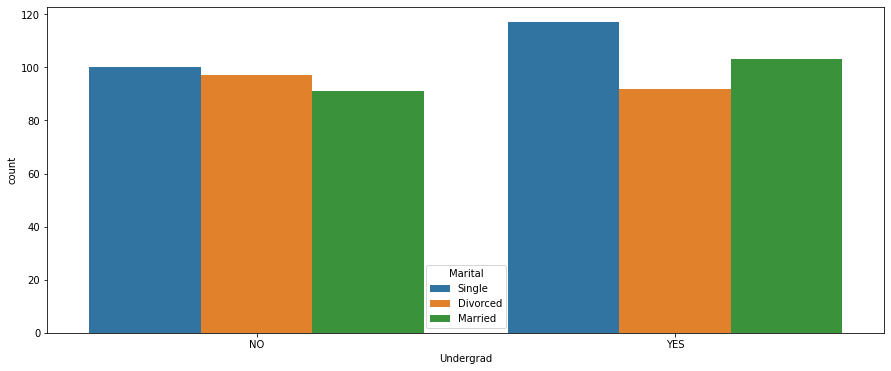

In [87]:
plt.rcParams['figure.figsize']=[15,6]
sns.countplot(x='Undergrad',hue='Marital',data=df)

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

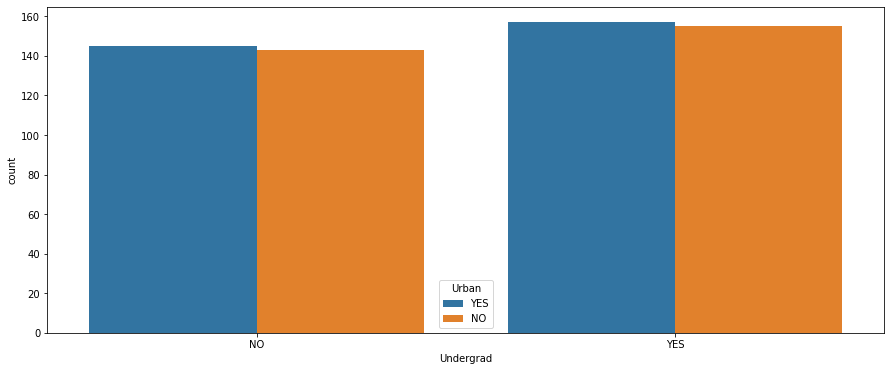

In [88]:
sns.countplot(x='Undergrad',hue='Urban',data=df)

<AxesSubplot:>

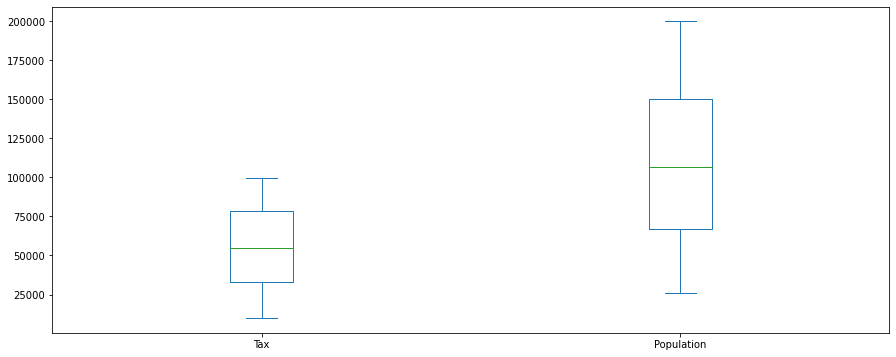

In [89]:
# checking for outliers
df[['Tax','Population']].plot(kind='box')

# Observation:
1. no Outlier present in dataset

In [90]:
#handling the categorical features
df1=pd.get_dummies(data=df,columns=['Undergrad','Marital','Urban'])
df1

,Tax,Population,Experience,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [91]:
corr=df1.corr()
corr

,Tax,Population,Experience,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES
Tax,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<AxesSubplot:>

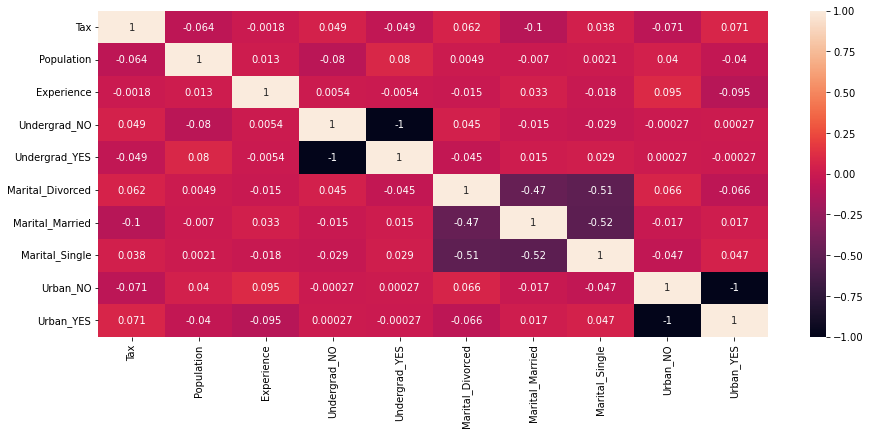

In [92]:
sns.heatmap(corr,annot=True)

# since our target variables are countinuos in nature we have to convert that into categorical feature 

In [93]:
df1['Tax_Inc']='Risky'
df1

,Tax,Population,Experience,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES,Tax_Inc
0,68833,50047,10,1,0,0,0,1,0,1,Risky
1,33700,134075,18,0,1,1,0,0,0,1,Risky
2,36925,160205,30,1,0,0,1,0,0,1,Risky
3,50190,193264,15,0,1,0,0,1,0,1,Risky
4,81002,27533,28,1,0,0,1,0,1,0,Risky
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Risky
596,69967,55369,2,0,1,1,0,0,0,1,Risky
597,47334,154058,0,1,0,1,0,0,0,1,Risky
598,98592,180083,17,0,1,0,1,0,1,0,Risky


# when the tax <= 30000 then Risky if >=30000 then Good

In [94]:
df1.loc[df1['Tax']>=30000,'Tax_Inc']='Good'
df1.tail(50)

,Tax,Population,Experience,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES,Tax_Inc
550,71238,68160,2,1,0,0,1,0,0,1,Good
551,32356,123082,0,0,1,0,1,0,0,1,Good
552,89094,109191,5,1,0,0,0,1,0,1,Good
553,91462,26884,13,1,0,0,0,1,0,1,Good
554,75585,147788,27,1,0,1,0,0,1,0,Good
555,31629,53848,10,1,0,0,0,1,1,0,Good
556,42063,34242,12,1,0,0,0,1,1,0,Good
557,12810,157421,10,0,1,0,1,0,1,0,Risky
558,85570,191139,12,1,0,1,0,0,0,1,Good
559,72026,180424,26,0,1,1,0,0,1,0,Good


<AxesSubplot:xlabel='Tax_Inc', ylabel='count'>

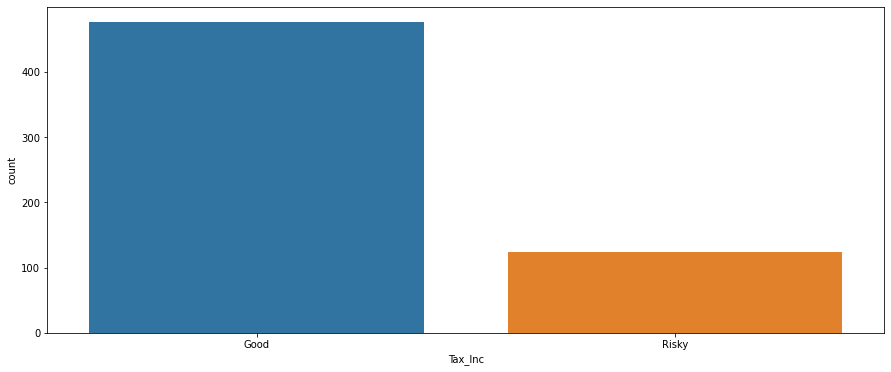

In [95]:
sns.countplot(x='Tax_Inc',data=df1)

In [96]:
# we don't required Tax  feature now so drop it
df1.drop(['Tax'],axis=1,inplace=True)
df1

,Population,Experience,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES,Tax_Inc
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Population        600 non-null    int64 
 1   Experience        600 non-null    int64 
 2   Undergrad_NO      600 non-null    uint8 
 3   Undergrad_YES     600 non-null    uint8 
 4   Marital_Divorced  600 non-null    uint8 
 5   Marital_Married   600 non-null    uint8 
 6   Marital_Single    600 non-null    uint8 
 7   Urban_NO          600 non-null    uint8 
 8   Urban_YES         600 non-null    uint8 
 9   Tax_Inc           600 non-null    object
dtypes: int64(2), object(1), uint8(7)
memory usage: 18.3+ KB


In [98]:
#convrting the data into dependent and independent featues
x=df1.iloc[:,0:9]
x.head()

,Population,Experience,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [101]:
y=df1.iloc[:,9:]
y.head()

,Tax_Inc
0,Good
1,Good
2,Good
3,Good
4,Good


In [102]:
#Spliting the data into train test data 
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=1)

# Buiding Model Using random forest model

In [110]:
from sklearn.ensemble import RandomForestClassifier as RF
model=RF(n_jobs=4,n_estimators=150,oob_score=True,criterion='entropy')


In [113]:
# fit model over train  data set to check accuracy
model.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_8888\162120645.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=150, n_jobs=4,
                       oob_score=True)

In [114]:
model.oob_score_

0.7229166666666667

In [115]:

pred_train=model.predict(x_train)

In [118]:
# finding accuracy score for train data
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_train)

1.0

In [119]:
#confusion matrix for train data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_train)

array([[379,   0],
       [  0, 101]], dtype=int64)

In [127]:
# now we will predct data over test datase
pred_test=model.predict(x_test)
pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',


In [122]:
# finding accuracy score for test data
accuracy_score(y_test,pred_test)

0.7583333333333333

In [123]:
#confusion matrix for train data
confusion_matrix(y_test,pred_test)

array([[91,  6],
       [23,  0]], dtype=int64)

In [131]:
Y_test=y_test.iloc[:,0]



In [126]:
pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',


In [133]:
df3=pd.DataFrame({"Actual":Y_test,'Predicted':pred_test})
df3

,Actual,Predicted
446,Risky,Good
404,Good,Good
509,Risky,Good
455,Good,Good
201,Good,Good
...,...,...
5,Good,Good
224,Good,Good
159,Good,Good
38,Risky,Good


# Conclusion:
1. over the train data model accuracy score is 100% and on test data its accuracy score is 75.8%
2. from confusion matrix 91 instances predicted correctly and 29 instances wrong prediction done by model

In [140]:
col_name=x_train.columns

In [141]:
features_imp=model.feature_importances_

In [145]:
pd.DataFrame({'features':col_name,'feature_imp':features_imp}).sort_values(by='feature_imp',ascending=False)

,features,feature_imp
0,Population,0.519709
1,Experience,0.362404
3,Undergrad_YES,0.017859
5,Marital_Married,0.017833
4,Marital_Divorced,0.017528
8,Urban_YES,0.016384
7,Urban_NO,0.016328
2,Undergrad_NO,0.016099
6,Marital_Single,0.015856


# Population is most important feature